# "That's My Poison" Simulation
## Game Description
This is an in-development cooperative trick-taking game for 3 to 7 players. We are cooks working together in a single restaurant. Every round you get a new recipe, and want to collect ingredients to make as many servings as possible. But you also develop a new dietary restriction, so one ingredient is your poison.
## Simulation Goal
For each player count, assuming that each player plays their lowest card as their poison declaration, what is the average amount of poison the players get in one round just from their declaration cards? 

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iterations = 100 # declare number of simulated rounds for each player count
ingredients_all = pd.read_csv('ingredients.csv') # read csv of ingredient cards into a dataframe
ingredients_all = ingredients_all[['name','suit','rank']] # remove unused columns
suits_all = ingredients_all['suit'].unique() # get list of suits
suits_all = np.delete(suits_all, np.where(suits_all=='sugar')) # remove sugar (unused in this simulation)

In [ ]:
results = [] # create empty list to hold results

for player_count in range(3, 8): # iterate through each possible number of players
    # adjust the deck of cards based on the player count
    if player_count == 3:
        n_suits = 4
        n_ranks = 6
    elif player_count == 4:
        n_suits = 5
        n_ranks = 6
    elif player_count == 5:
        n_suits = 5
        n_ranks = 7
    elif player_count == 6:
        n_suits = 6
        n_ranks = 7
    elif player_count == 7:
        n_suits = 7
        n_ranks = 7

    # CREATE DECK
    suits = np.random.choice(suits_all, size=n_suits, replace=False) # randomly select suits
    deck = ingredients_all[ingredients_all['suit'].isin(suits)] # remove unused suits
    deck = deck[deck['rank']<=n_ranks] # remove unused ranks

    # SIMULATE ROUNDS
    for x in range(0, iterations):
        # DEAL CARDS
        cards = deck # create mutable copy of deck
        players = {} # player hands stored in dictionary
        for i in range(1, player_count+1): # for each player
            player_hand = cards.sample(n=7) # randomly select 7 cards
            players['player{0}'.format(i)] = player_hand # assign cards to player
            cards = cards[~cards['name'].isin(player_hand['name'])] # remove those cards from the deck

        # CALCULATE POISON
        poison_cards = [] # create empty list to hold cards
        for player, hand in players.items(): # for each player's hand
            lowest_rank = hand['rank'].min() # find the lowest rank card
            poison_cards.append(lowest_rank) # append value to list
        
        total_poison = np.sum(poison_cards) # calculate total poison
        
        # save results
        results.append([player_count, total_poison, poison_cards])

,total_poison
player_count,
3,3.86
4,5.28
5,6.89
6,8.25
7,9.72


In [ ]:
# convert results to dataframe
results_df = pd.DataFrame(results, columns=['player_count','total_poison','poison_cards'])
# calculate mean poison by player count
results_df[['player_count','total_poison']].groupby('player_count').mean()
# calculate mean poison divided by number of players

,total_poison
player_count,
3,3.86
4,5.28
5,6.89
6,8.25
7,9.72


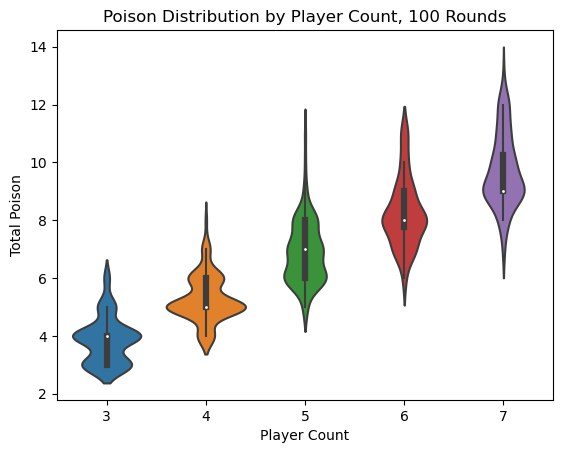

In [ ]:
# visualize distribution
fig, ax = plt.subplots()
sns.violinplot(data=results_df.pivot(columns='player_count',values='total_poison'))
ax.set_xlabel('Player Count')
ax.set_ylabel('Total Poison')
ax.set_title(f'Poison Distribution by Player Count, {iterations} Rounds')
plt.show()